# **Plot 2 Seaborn - Boxplot**

## Hypothèse 2

Notre hypothèse de recherche est la suivante : « Certains aéroports new-yorkais sont plus touchés par les retards. ».

### Rôle de l'Hypothèse

Cette hypothèse est fondamentale car elle guide le choix de nos variables, de nos outils de visualisation, et l'interprétation de nos résultats.

- Variables Clés : Pour tester cette hypothèse, nous avons concentré notre analyse sur la variable catégorielle origin (aéroport de départ : JFK, LGA, EWR) et sur la variable numérique arr_delay (retard à l'arrivée).

- Objectif de l'Analyse : L'objectif est de comparer la moyenne et la distribution des retards (arr_delay) entre les trois groupes définis par la variable origin.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#1. Charge le csv
df = pd.read_csv('/content/nycflights.csv')


In [3]:
#2. Préparation et filtrage des donnees
df_arr_total = df['arr_delay']

df_vol = df.dropna(subset='arr_delay') # on va utiliser ce variable

if (len(df_arr_total) == len(df_vol)):
  print("Il n'y a pas de valeurs manquantes")
else:
  print("Il y a des valeurs manquantes")

Il n'y a pas de valeurs manquantes


In [4]:
#3. Calculer orde des aeroport par retard moyen
ordre_aeroport = df_vol.groupby('origin')['arr_delay'].mean().sort_values(ascending=False).index
print(ordre_aeroport)

Index(['EWR', 'JFK', 'LGA'], dtype='object', name='origin')


Creation du Boxplot

,Median,Mean
origin,,
EWR,-3.0,9.326820
JFK,-5.0,5.983849
LGA,-5.0,5.707063


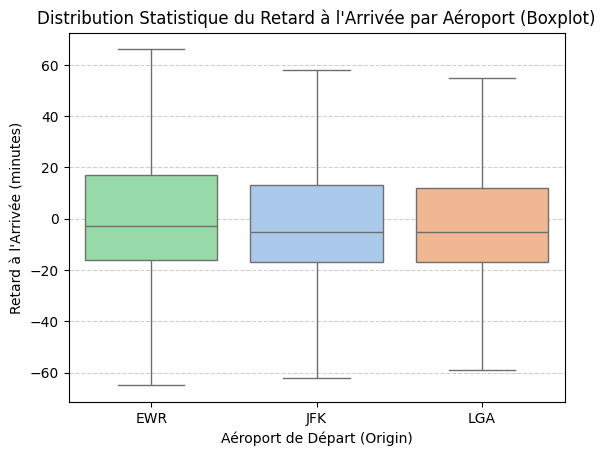

In [5]:
from pandas.plotting import table
sbn.boxplot(x='origin',
            y='arr_delay',
            hue='origin',
            data=df_vol,
            order=ordre_aeroport,
            palette="pastel",
            legend=False,
            showfliers=False)

# 4. Ajout des Titres et Étiquettes (En Français)
plt.title('Distribution Statistique du Retard à l\'Arrivée par Aéroport (Boxplot)')
plt.xlabel('Aéroport de Départ (Origin)')
plt.ylabel('Retard à l\'Arrivée (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)


# Sauvegarder le graphique (à inclure dans le dossier de rendu)
plt.savefig('serdar_varol_seaborn_plot2.png')

# Afficher les statistiques clés

table_stat = df_vol.groupby('origin')['arr_delay'].agg(['median', 'mean']).sort_values(by='mean', ascending=False)
table_stat.columns = ['Median','Mean']
table_stat


### Interprétation (Plot 2)

**Observation**

Le Boxplot, représentant la distribution statistique du retard à l'arrivée (arr_delay), révèle des disparités notables entre les aéroports. L'aéroport de Newark (EWR) présente clairement la moyenne de retard la plus élevée (≈9.3 minutes), dépassant significativement celle de JFK (≈6.0 minutes) et LGA (≈5.7 minutes). Bien que la médiane pour les trois aéroports soit négative (indiquant que plus de 50% des vols arrivent en avance), la médiane de EWR (−3.0 minutes) est la plus proche de zéro, ce qui démontre que la performance globale de EWR est la moins ponctuelle.

**Conclusion par rapport à l'Hypothèse**

Les données issues de la distribution statistique confirment l'Hypothèse 2 (« Certains aéroports new-yorkais sont plus touchés par les retards »). La comparaison des médianes et des moyennes prouve que la problématique des retards est concentrée sur l'aéroport de EWR (Newark), qui est systématiquement le plus pénalisé en termes de temps de retard accumulé.